In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [2]:
# https://datamarket.com/data/set/22ti/zuerich-monthly-sunspot-numbers-1749-1983#!ds=22ti&display=line
df = pd.read_csv(
    'zuerich-monthly-sunspot-numbers-.csv',
)

In [3]:
df.head()

,Month,Zuerich_monthly_sunspot_numbers_1749-1983
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [4]:
df.tail()

,Month,Zuerich_monthly_sunspot_numbers_1749-1983
2815,Aug-83,71.8
2816,Sep-83,50.3
2817,Oct-83,55.8
2818,Nov-83,33.3
2819,Dec-83,33.4


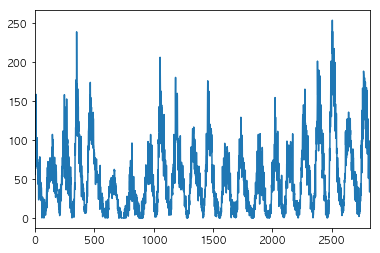

In [5]:
df['Zuerich_monthly_sunspot_numbers_1749-1983'].plot()

In [6]:
df.shape

(2820, 2)

## Feature Engineering

In [7]:
def convert_to_datetime(date):
    try:
        return pd.to_datetime(date, format='%Y-%m')
    except:
        return pd.to_datetime(date, format='%b-%y')

df['datetime'] = df['Month'].map(convert_to_datetime)

In [8]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

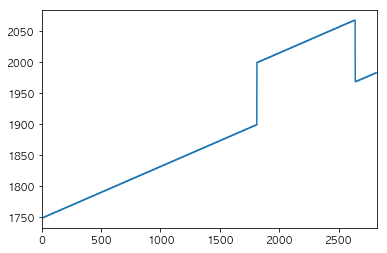

In [9]:
df['year'].plot()

In [10]:
df['year'] = [y if y < 2000 else (y - 100) for y in df['year']]

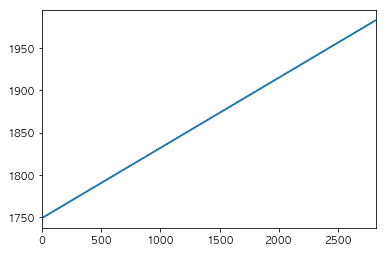

In [11]:
df['year'].plot()

## train, test

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, shuffle=False, test_size=0.2, random_state=0)

In [13]:
feature_columns = ['year', 'month']
target_colunns = 'Zuerich_monthly_sunspot_numbers_1749-1983'

X_train = train[feature_columns]
y_train = train[target_colunns]

X_test = test[feature_columns].reset_index(drop=True)
y_test = test[target_colunns].reset_index(drop=True)

## predict

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

48.329151340846209

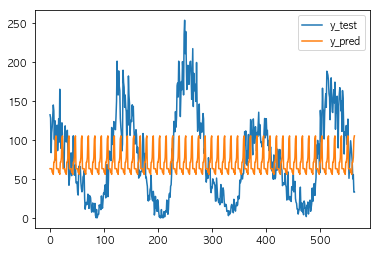

In [17]:
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.legend()

In [18]:
df2 = df[['datetime', 'Zuerich_monthly_sunspot_numbers_1749-1983']]
df2['id'] = [0 for y in df2.index]

/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
from tsfresh import extract_features
extracted_features = extract_features(df2, column_id='id', column_sort='datetime')

/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Feature Extraction: 100%|██████████| 1/1 [00:09<00:00,  9.64s/it]


In [20]:
extracted_features.head()

variable,Zuerich_monthly_sunspot_numbers_1749-1983__abs_energy,Zuerich_monthly_sunspot_numbers_1749-1983__absolute_sum_of_changes,"Zuerich_monthly_sunspot_numbers_1749-1983__agg_autocorrelation__f_agg_""mean""","Zuerich_monthly_sunspot_numbers_1749-1983__agg_autocorrelation__f_agg_""median""","Zuerich_monthly_sunspot_numbers_1749-1983__agg_autocorrelation__f_agg_""var""","Zuerich_monthly_sunspot_numbers_1749-1983__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","Zuerich_monthly_sunspot_numbers_1749-1983__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","Zuerich_monthly_sunspot_numbers_1749-1983__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","Zuerich_monthly_sunspot_numbers_1749-1983__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","Zuerich_monthly_sunspot_numbers_1749-1983__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,Zuerich_monthly_sunspot_numbers_1749-1983__time_reversal_asymmetry_statistic__lag_1,Zuerich_monthly_sunspot_numbers_1749-1983__time_reversal_asymmetry_statistic__lag_2,Zuerich_monthly_sunspot_numbers_1749-1983__time_reversal_asymmetry_statistic__lag_3,Zuerich_monthly_sunspot_numbers_1749-1983__value_count__value_-inf,Zuerich_monthly_sunspot_numbers_1749-1983__value_count__value_0,Zuerich_monthly_sunspot_numbers_1749-1983__value_count__value_1,Zuerich_monthly_sunspot_numbers_1749-1983__value_count__value_inf,Zuerich_monthly_sunspot_numbers_1749-1983__value_count__value_nan,Zuerich_monthly_sunspot_numbers_1749-1983__variance,Zuerich_monthly_sunspot_numbers_1749-1983__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,12733264.62,34039.2,0.443809,0.470112,0.105622,63.540476,0.120038,0.075424,0.037279,100.836358,...,-55.221708,397.907341,95.186522,0.0,67.0,5.0,0.0,0.0,1887.143671,1.0
